In [4]:
#import pandas numpy matplotlib
%matplotlib inline 
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

#Import the necessary methods from tweepy library
#from tweepy.streaming import StreamListener
#from tweepy import OAuthHandler
#from tweepy import Stream



In [15]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'AhnQ75Njvid1E0F5OfDka0Mdy'
CONSUMER_SECRET = 'Gza45JFyy6bAEMkZWGx4Edk3yT70lE6cl0nwHKun823lk71cbf'
OAUTH_TOKEN = '221085452-JpzdsvDoqh5xswyAb2HPHt4oPQxX5S8IP4OHbaGo'
OAUTH_TOKEN_SECRET = 'fiLvFHqV3HK0aYiSyD75IpxeUNhYqW7ccdsDzLvIRzE6D'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

In [16]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print
print(us_trends)

[{'locations': [{'name': 'Worldwide', 'woeid': 1}], 'as_of': '2016-02-08T13:16:42Z', 'trends': [{'name': '#FelizLunes', 'promoted_content': None, 'query': '%23FelizLunes', 'tweet_volume': 28451, 'url': 'http://twitter.com/search?q=%23FelizLunes'}, {'name': 'Pangako Ng Pagkabisto', 'promoted_content': None, 'query': '%22Pangako+Ng+Pagkabisto%22', 'tweet_volume': 647682, 'url': 'http://twitter.com/search?q=%22Pangako+Ng+Pagkabisto%22'}, {'name': '#تضييع_علومي', 'promoted_content': None, 'query': '%23%D8%AA%D8%B6%D9%8A%D9%8A%D8%B9_%D8%B9%D9%84%D9%88%D9%85%D9%8A', 'tweet_volume': None, 'url': 'http://twitter.com/search?q=%23%D8%AA%D8%B6%D9%8A%D9%8A%D8%B9_%D8%B9%D9%84%D9%88%D9%85%D9%8A'}, {'name': '#TitiriterosDetenidosARV', 'promoted_content': None, 'query': '%23TitiriterosDetenidosARV', 'tweet_volume': None, 'url': 'http://twitter.com/search?q=%23TitiriterosDetenidosARV'}, {'name': '#استقاله_فيصل_بن_تركي', 'promoted_content': None, 'query': '%23%D8%A7%D8%B3%D8%AA%D9%82%D8%A7%D9%84%D9%87_%

In [17]:
import json

print(json.dumps(world_trends, indent=1))
print()
print(json.dumps(us_trends, indent=1))

[
 {
  "locations": [
   {
    "name": "Worldwide",
    "woeid": 1
   }
  ],
  "as_of": "2016-02-08T13:16:42Z",
  "trends": [
   {
    "name": "#FelizLunes",
    "promoted_content": null,
    "query": "%23FelizLunes",
    "tweet_volume": 28451,
    "url": "http://twitter.com/search?q=%23FelizLunes"
   },
   {
    "name": "Pangako Ng Pagkabisto",
    "promoted_content": null,
    "query": "%22Pangako+Ng+Pagkabisto%22",
    "tweet_volume": 647682,
    "url": "http://twitter.com/search?q=%22Pangako+Ng+Pagkabisto%22"
   },
   {
    "name": "#\u062a\u0636\u064a\u064a\u0639_\u0639\u0644\u0648\u0645\u064a",
    "promoted_content": null,
    "query": "%23%D8%AA%D8%B6%D9%8A%D9%8A%D8%B9_%D8%B9%D9%84%D9%88%D9%85%D9%8A",
    "tweet_volume": null,
    "url": "http://twitter.com/search?q=%23%D8%AA%D8%B6%D9%8A%D9%8A%D8%B9_%D8%B9%D9%84%D9%88%D9%85%D9%8A"
   },
   {
    "name": "#TitiriterosDetenidosARV",
    "promoted_content": null,
    "query": "%23TitiriterosDetenidosARV",
    "tweet_volume": null,

In [18]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#StormImogen', '#qanda', '#MakeAMovieWet', '#FelizLunes'}


## collecting search results

In [22]:
# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#StormImogen'

count = 500

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 200
{
 "in_reply_to_status_id": null,
 "favorited": false,
 "coordinates": null,
 "metadata": {
  "result_type": "recent",
  "iso_language_code": "en"
 },
 "user": {
  "followers_count": 127,
  "location": "",
  "time_zone": "London",
  "screen_name": "GuyAndrewMurray",
  "name": "Guy",
  "profile_banner_url": "https://pbs.twimg.com/profile_banners/3126169913/1454769799",
  "default_profile_image": false,
  "profile_link_color": "0084B4",
  "statuses_count": 3162,
  "lang": "en",
  "favourites_count": 1707,
  "contributors_enabled": false,
  "following": false,
  "profile_sidebar_fill_color": "DDEEF6",
  "profile_background_tile": false,
  "profile_text_color": "333333",
  "is_translation_enabled": false,
  "default_profile": true,
  "created_at": "Sun Mar 29 10:18:47 +0000 2015",
  "is_translator": false,
  "notifications": false,
  "id": 3126169913,
  "has_extended_profile": false,
  "description": "Anglo Irishman Achie

## Extracting Tweet entities

In [23]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1)) 
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "I wish the wind would just fuck off. The dogs think we are under attack. #StormImogen",
 "RT @KernowRT: RT BeachRetreats: Sennen in far West #Cornwall is taking the brunt of #StormImogen. Images from CornishmanPaper. https://t.co\u2026",
 "Barely a whimper of wind on the south coast in Hastings, so I'm venturing out to brave some minor disarrangement to my hair #StormImogen",
 "#StormImogen",
 "Wednesday's meeting at @LimerickRaces has been cancelled due to a water-logged track. #StormImogen https://t.co/0d2pWsVQP4"
]
[
 "KernowRT",
 "LimerickRaces",
 "JonMitchellITV",
 "itvcalendar",
 "rareaddictions"
]
[
 "StormImogen",
 "Cornwall",
 "StormImogen",
 "StormImogen",
 "StormImogen"
]
[
 "I",
 "wish",
 "the",
 "wind",
 "would"
]


## Frequency analysis of Tweets

In [24]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('#StormImogen', 161), ('RT', 133), ('the', 89), ('in', 58), ('to', 53), ('of', 52), ('a', 50), ('is', 40), ('and', 33), ('on', 27)]

[('metoffice', 12), ('bbcweather', 11), ('BBCNews', 10), ('kenned10', 7), ('johncurtinEA', 5), ('mia_williamsxo', 4), ('BBCWales', 4), ('WalesOnline', 4), ('itvnews', 3), ('EnvAgency', 3)]

[('StormImogen', 183), ('stormimogen', 15), ('Cornwall', 7), ('staysafe', 5), ('cornwall', 5), ('mullion', 3), ('rnli', 3), ('Brighton', 3), ('flood', 3), ('Dorset', 3)]



##  using pretty tables to prettify

In [27]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------------+-------+
| Word         | Count |
+--------------+-------+
| #StormImogen |   161 |
| RT           |   133 |
| the          |    89 |
| in           |    58 |
| to           |    53 |
| of           |    52 |
| a            |    50 |
| is           |    40 |
| and          |    33 |
| on           |    27 |
+--------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| metoffice      |    12 |
| bbcweather     |    11 |
| BBCNews        |    10 |
| kenned10       |     7 |
| johncurtinEA   |     5 |
| mia_williamsxo |     4 |
| BBCWales       |     4 |
| WalesOnline    |     4 |
| itvnews        |     3 |
| EnvAgency      |     3 |
+----------------+-------+
+-------------+-------+
| Hashtag     | Count |
+-------------+-------+
| StormImogen |   183 |
| stormimogen |    15 |
| Cornwall    |     7 |
| staysafe    |     5 |
| cornwall    |     5 |
| mullion     |     3 |
| rnli        |     3 |
| Brighton    |     3 |
| flood 

## Examining popular retweets

In [47]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status['text'] in ('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+------+
| Count | Screen Name | Text |
+-------+-------------+------+
+-------+-------------+------+


In [49]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print([r['user']['screen_name'] for r in _retweets])

['melissacaaag', 'jyeee', 'Ceejaynatics', 'Majendalove', 'ikaayyy_', 'RafaellaaaMae', 'LoveKyana18', 'iiaamcamillee', 'kidamgos', 'shangxshang', 'asdfghjbl', 'Papagars__']


In [50]:
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## frequencies of words

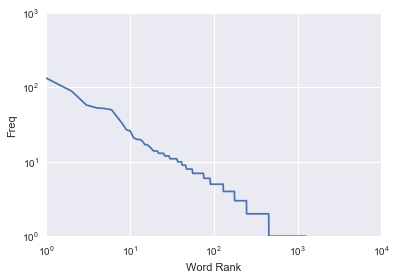

In [51]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

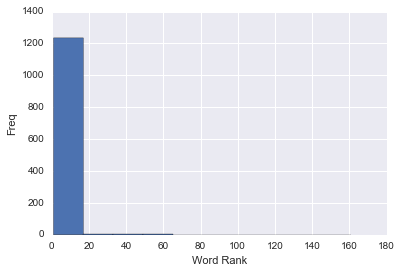

In [52]:
plt.hist(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

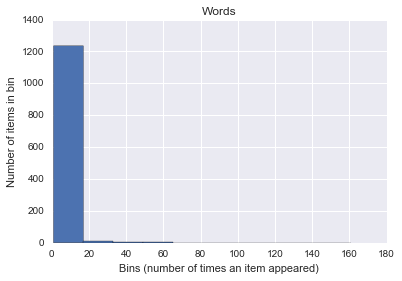

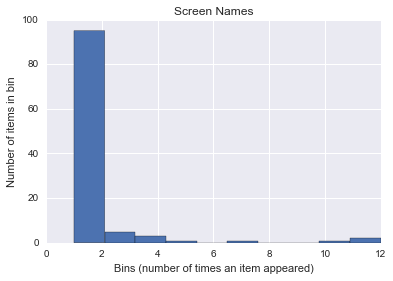

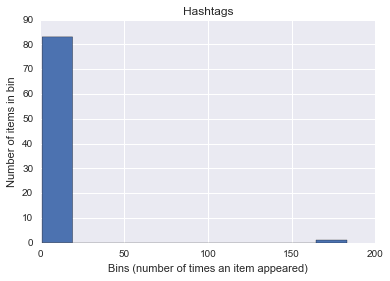

In [54]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))  #wrap c.values in list for Python 3.X
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()